<a href="https://colab.research.google.com/github/shanawaz100/Machine-learning/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
To understand and load the salary dataset for
linear regression.

Tasks:
1. Download the dataset from Kaggle.
2. Load the dataset using Pandas.
3. Display first and last five rows.
4. Identify input and output variables.

Conclusion: The dataset was successfully loaded and variables were identified.


In [1]:
# 2. Load the dataset using Pandas.
import pandas as pd
df = pd.read_csv('Salary_dataset.csv')
df



,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
# 3. Display first and last five rows.
display(df.head())
display(df.tail())

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [4]:
# 4. Identify input and output variables.
df.columns


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

Objective:
To preprocess data and convert it into NumPy arrays.

Tasks:
1. Separate independent and dependent variables.
2. Convert data into NumPy arrays.
3. Reshape arrays for computation.
4. Normalize the data if required.


Conclusion:
Data preprocessing was completed using NumPy.


In [8]:
# 1. Separate independent and dependent variables.
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

In [13]:
# 2. Convert data into NumPy arrays.
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

In [15]:
#3. Reshape arrays for computation.
X = df['YearsExperience'].values.reshape(-1, 1) # Reshaping X to be a 2D array
y = df['Salary'].values # y is already a 1D array

In [16]:
# 4. Normalize the data if required.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original X (first 5 rows):\n", X[:5])
print("Scaled X (first 5 rows):\n", X_scaled[:5])

Original X (first 5 rows):
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
Scaled X (first 5 rows):
 [[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]]


Objective:
To implement linear regression using mathematical equations.

Tasks:
1. Initialize slope and intercept.
2. Implement prediction equation.
3. Implement cost function (MSE).
4. Compute cost for given parameters.


Conclusion: Linear regression model was implemented without using libraries.


In [18]:
# 1. Initialize slope and intercept.
slope = 0
intercept = 0

In [20]:
# 2. Implement prediction equation.
def predict(X, slope, intercept):
    return slope * X + intercept

In [25]:
# 3. Implement cost function (MSE).
import numpy as np

def compute_cost(y_true, y_pred):
    # Number of training examples
    m = len(y_true)
    # Calculate the squared errors
    squared_errors = (y_pred - y_true) ** 2
    # Calculate the mean squared error
    cost = np.sum(squared_errors) / (2 * m) # Divided by 2m for convenience in gradient descent
    return cost

In [24]:
# 4. Compute cost for given parameters.

# Make predictions with current slope and intercept
y_pred = predict(X_scaled, slope, intercept)

# Compute the cost
current_cost = compute_cost(y, y_pred)

print(f"Current cost (MSE) with slope={slope} and intercept={intercept}: {current_cost}")

Current cost (MSE) with slope=0 and intercept=0: 97546609166.0


Objective:
To train the linear regression model using gradient descent.

Tasks:
1. Define learning rate and epochs.
2. Update slope and intercept iteratively.
3. Monitor cost reduction.
4. Store final model parameters.

Conclusion: The model was successfully trained using gradient descent.


In [28]:
# 1. Define learning rate and epochs.
learning_rate = 0.01
epochs = 1000

In [29]:
# 2. Update slope and intercept iteratively.

history = [] # To store cost history for monitoring

for epoch in range(epochs):
    # Make predictions with current parameters
    y_pred = predict(X_scaled, slope, intercept)

    # Calculate gradients
    # dJ/d_slope = (1/m) * sum((y_pred - y_true) * X)
    # dJ/d_intercept = (1/m) * sum(y_pred - y_true)
    m = len(y) # Number of examples
    d_slope = np.sum((y_pred - y) * X_scaled) / m
    d_intercept = np.sum(y_pred - y) / m

    # Update parameters
    slope = slope - learning_rate * d_slope
    intercept = intercept - learning_rate * d_intercept

    # Compute and store the cost for monitoring
    cost = compute_cost(y, y_pred)
    history.append(cost)

    # Optional: Print cost every 100 epochs to see progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Cost = {cost}")

print(f"Final Slope: {slope}")
print(f"Final Intercept: {intercept}")

Epoch 0: Cost = 97546609166.0
Epoch 100: Cost = 10897488926.0
Epoch 200: Cost = 10897488926.0
Epoch 300: Cost = 10897488926.0
Epoch 400: Cost = 10897488926.0
Epoch 500: Cost = 10897488926.0
Epoch 600: Cost = 10897488926.0
Epoch 700: Cost = 10897488926.0
Epoch 800: Cost = 10897488926.0
Epoch 900: Cost = 10897488926.0
Final Slope: -3.861108173926672e-12
Final Intercept: 76003.99999999999


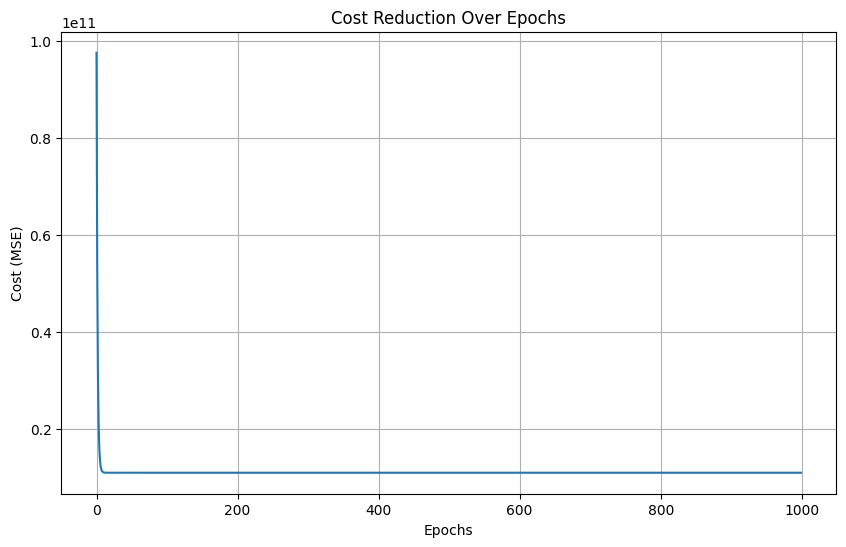

In [32]:
# 3. Monitor cost reduction.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction Over Epochs')
plt.grid(True)
plt.show()

In [34]:
# 4. Store final model parameters.
print(f"Stored Final Slope: {slope}")
print(f"Stored Final Intercept: {intercept}")

Stored Final Slope: -3.861108173926672e-12
Stored Final Intercept: 76003.99999999999


Objective:
To evaluate model performance and visualize results.

Tasks:
1. Predict salary using trained model.
2. Calculate Mean Squared Error.
3. Plot regression line with data points.
4. Interpret the results.

Conclusion: Model predictions and performance were evaluated and visualized.


In [35]:
# 1. Predict salary using trained model.
y_pred_final = predict(X_scaled, slope, intercept)
print("First 5 predicted salaries:\n", y_pred_final[:5])

First 5 predicted salaries:
 [[76004.]
 [76004.]
 [76004.]
 [76004.]
 [76004.]]


In [37]:
# 2. Calculate Mean Squared Error.
mse = compute_cost(y, y_pred_final)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 10897488926.0


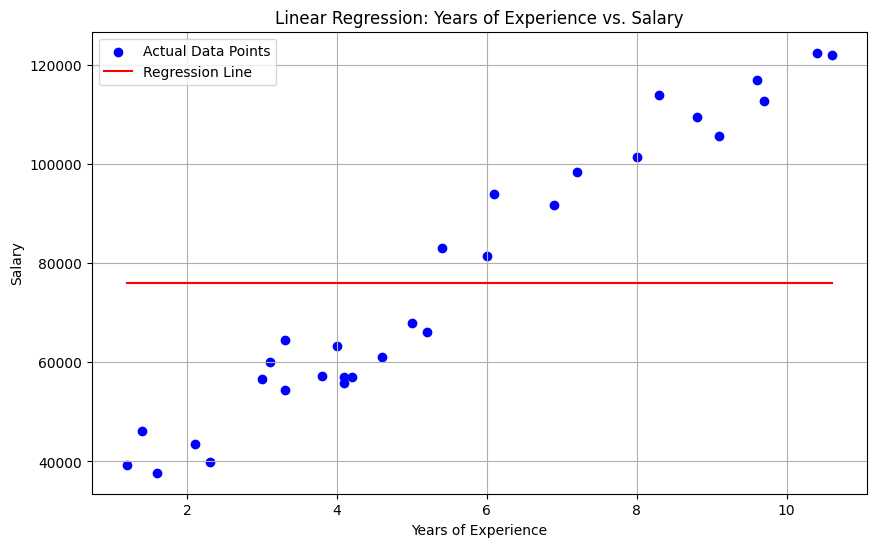

In [39]:
# 3. Plot regression line with data points.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data Points')
plt.plot(X, y_pred_final, color='red', label='Regression Line')
plt.title('Linear Regression: Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()